In [1]:
import numpy as np
import time
from math import sqrt, pi, exp
import functools
import scipy
import matplotlib.pylab as pl
from varname import nameof


from utils.preconditioners import *
from utils.algorithms import *
from utils.functions import *

### Test case "banana"


Text(0.5, 1.0, 'Posterior distribution')

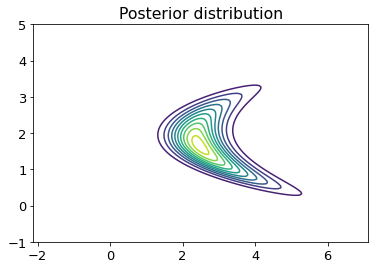

In [2]:
d = 2 

y = 0 
xmin = -2
xmax = 7
ymin= -1
ymax= 5


# potential function
sigNoise = 0.5
sigPrior = 2

G = lambda u: ((u[1]-2)**2-(u[0]-3.5) -1)
Phi = lambda u: 0.5/(sigNoise**2)*(G(u)-y)**2 #likelihood


# potential function
I = lambda u: Phi(u) + 0.5/(sigPrior**2)*np.linalg.norm(u,axis=0)**2


# Plot test case
u0s = np.linspace(xmin,xmax,150)
u1s = np.linspace(ymin,ymax,150)
U0, U1 = np.meshgrid(u0s,u1s)
U = np.stack((U0,U1))

plt.figure()
plt.contour(U0, U1, np.exp(-I(U)), 10)
plt.axis('equal')
plt.title("Posterior distribution")

### Try algorithms 

In [3]:
# parameters of all the algorithms

J = 20  # number of particles 
N_sim = 1000 # number of iterations
d = 2 # dimension
tau = 0.01 # step size
u0 = np.random.normal(0,1.0,(d,J)) # initial position of the particles

# parameters of our algorithm
const = 1.5 

Text(0.5, 1.0, 'Posterior distribution and initialization')

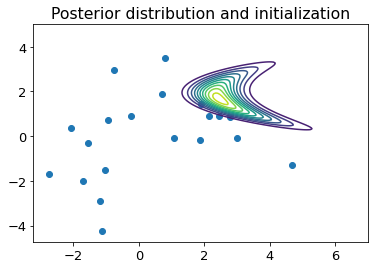

In [4]:
# initial position of the particles

u0 = np.random.normal(0,2.0,(d,J)) 

plt.figure()
plt.contour(U0, U1, np.exp(-I(U)), 10)
plt.scatter(u0[0],u0[1])
plt.title("Posterior distribution and initialization")

In [5]:
# ULA
start_time = time.time()
us_list_ULA = run_ULA(I, N_sim, u0, tau)
us_list_ULA.tofile('save_data/banana/ULA_J_'+str(us_list_ULA.shape[1])+'_Nsim_'+str(us_list_ULA.shape[2])+'_tau_'+str(tau)+'.dat')
print(f"ULA: {time.time()-start_time} seconds")

# ALDI 
start_time = time.time()
us_list_ALDI = run_ALDI_with_gradient(I, N_sim, u0, tau)
us_list_ALDI.tofile('save_data/banana/ALDI_J_'+str(us_list_ALDI.shape[1])+'_Nsim_'+str(us_list_ALDI.shape[2])+'_tau_'+str(tau)+'.dat')
print(f"ALDI with gradient: {time.time()-start_time} seconds")


# NRALDI (our scheme)

# eventually new parameters like stepsize

#N_sim = 1000 # number of iterations
tau_ALDINR = 1e-4
#tau_ALDINR = tau

start_time = time.time()
us_list_ALDINR, means = run_ALDINR(I, N_sim, u0, tau_ALDINR, const)
us_list_ALDINR.tofile('save_data/banana/ALDINR_J_'+str(us_list_ALDINR.shape[1])+'_Nsim_'+str(us_list_ALDINR.shape[1])+'_tau_'+str(tau_ALDINR)+'.dat')
print(f"ALDI: {time.time()-start_time} seconds")


ULA: 9.302487134933472 seconds


/var/folders/_t/h78tns5s2990dvmw2d6kzfyw0000gn/T/ipykernel_6457/3689133938.py:15: RuntimeWarning: overflow encountered in square
  Phi = lambda u: 0.5/(sigNoise**2)*(G(u)-y)**2 #likelihood
/Users/annakorba/Desktop/square/code_eks/utils/grad_inference.py:47: RuntimeWarning: overflow encountered in square
  mat2 = (mat1**2)/2
/opt/anaconda3/lib/python3.8/site-packages/scipy/sparse/linalg/isolve/lsmr.py:247: RuntimeWarning: invalid value encountered in multiply
  u = (1 / beta) * u
/opt/anaconda3/lib/python3.8/site-packages/scipy/sparse/linalg/isolve/lsmr.py:370: RuntimeWarning: invalid value encountered in double_scalars
  betacheck = -shat * betadd
/Users/annakorba/Desktop/square/code_eks/utils/grad_inference.py:39: RuntimeWarning: invalid value encountered in subtract
  V = vs-vs[ind]
/opt/anaconda3/lib/python3.8/site-packages/scipy/sparse/linalg/isolve/lsmr.py:323: RuntimeWarning: invalid value encountered in multiply
  u *= -alpha


ALDI with gradient: 25.696264028549194 seconds
iter
0
2.5522991843591414
2.6090370481949967
2.6491186263522195
2.627214357783239
2.5874339050057826
2.5142923498874095
2.437352702876407
2.3277891501724888
2.2511999601281665
2.15403401126286
2.0404290945891206
1.923564641091276
1.822898576694667
1.7248239029666645
1.6348723986405738
1.5715406528969547
1.5195058567307513
1.4587284471933697
1.37972451816413


/Users/annakorba/Desktop/square/code_eks/utils/algorithms.py:107: ComplexWarning: Casting complex values to real discards the imaginary part
  us_list_ALDINR[:,:,n+1] = us+tau*drift  + np.sqrt(tau)*diff


1.3283783152338777
1.273277520042752
1.2107649334272357
1.147498436548144
1.098492887964083
1.0376254188194178
0.986977898070962
0.9660876219654366
0.92264672044422
0.8784336234307446
0.848435284972797
0.8151639680023303
0.7885082096228129
0.7563764213873688
0.7218916674016289
0.6978989314716108
0.6575193513391033
0.6321693224882041
0.5998245642961016
0.5771304868725862
0.5469444144556316
0.5283962202809288
0.5020598220805822
0.4976338022220902
0.4735787371713806
0.45485522171646325
0.4577712343591279
0.43393809871364275
0.4157367063292089
0.4017126054681372
0.37980731772048587
0.3553589617258925
0.331065378575766
0.3238070492636612
0.30467591695444934
0.29008757771437116
0.27843326544659197
0.25916853086649666
0.2500654746281063
0.24934332874057089
0.2339830838165653
0.21397632752416074
0.19718040945659576
0.18836087138522664
0.17954931717019107
0.1693530725100534
0.16012336145817177
0.16196051953343013
0.1541060157585913
0.1448636747418058
0.14071235458916
0.12852005952815782
0.12068

1.1048460833298386
1.097454611729042
1.0776367351406888
1.070747968927249
1.066567609324503
1.0586584155202579
1.0590171194677263
1.0689465745437738
1.0584241675002848
1.0592828596123942
1.0764129894315397
1.0850038131504847
1.0951737845144691
1.0846644268315027
1.103593678618014
1.093869062207594
1.09389487922032
1.0835872409036986
1.0951066940068708
1.0979842933138515
1.1151193797467556
1.1147737926046057
1.1047406281173209
1.0788889461692088
1.0731461534677822
1.062111840246384
1.0647356881475245
1.0751946166534858
1.0864250970002574
1.069693185613394
1.0579805639689748
1.0579516861855232
1.0695112952978
1.0696342015454505
1.0632677827105297
1.0715679302794228
1.054801330831183
1.057178169261389
1.0554455120545703
1.050405975580993
1.0563364893042166
1.060491977391233
1.0561593330286085
1.0514517597353805
1.0569406521889613
1.0700598119364935
1.0775888683300512
1.0841953565819875
1.0941293048998515
1.0926933117237998
1.1071395175987555
1.1098674699822773
1.1073251171574183
1.1180963

1.251946080226959
1.2350865890623728
1.2116223562165904
1.2033948594165047
1.2044096381487384
1.196336381176809
1.1847850205557142
1.1798533746407678
1.171998513379004
1.1740878748275945
1.1654349718935664
1.1603928758879096
1.1778590099022679
1.1710484189599244
iter
900
1.1759786381689368
1.1633594397931566
1.1616580194019177
1.1683331131284125
1.1862068238354269
1.1960840289152963
1.2028865981546453
1.2091882018391664
1.2071463807273233
1.2180334674297233
1.2220186777344575
1.2142903756571666
1.221520721132016
1.2060461648274452
1.2047074719898936
1.1994397966366663
1.2098244796523652
1.1998408437789359
1.2050278102827416
1.201406776271059
1.1927278592289052
1.2149485514062446
1.2084173355630123
1.2140744721151902
1.1850693480657706
1.1912840663541637
1.1910369232232023
1.1914279828528
1.1990951741657208
1.217844700044374
1.2213683869566534
1.231097065421829
1.2154450686373182
1.2164772952295624
1.201861743872678
1.1994796839887196
1.1865227708781616
1.185142399161722
1.1825275246286

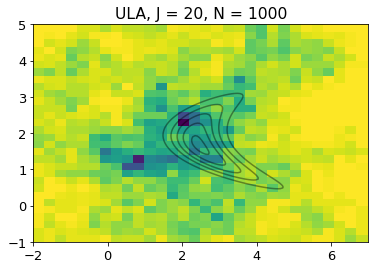

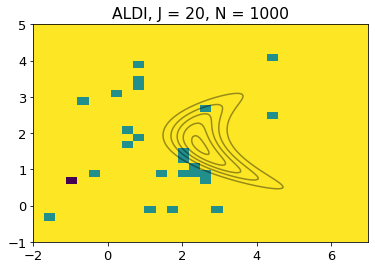

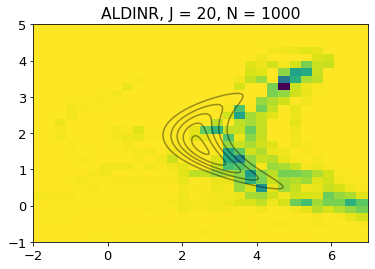

In [6]:
# plot results

name = nameof(us_list_ULA).lstrip('us_list')
plot_results(I, us_list_ULA, name, xmin = -2, xmax = 7, ymin = -1, ymax = 5)

name = nameof(us_list_ALDI).lstrip('us_list')
plot_results(I, us_list_ALDI, name, xmin = -2, xmax = 7, ymin = -1, ymax = 5)
    
name = nameof(us_list_ALDINR).lstrip('us_list')
plot_results(I, us_list_ALDINR, name, xmin = -2, xmax = 7, ymin = -1, ymax = 5)


In [7]:
print(name)

ALDINR
